In [7]:
import Function as F
import DefineFiles as D
import importlib
import tracking as tr
importlib.reload(F)
importlib.reload(D) 
importlib.reload(tr)
from Function import *
from DefineFiles import *
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import ruptures as rpt
import tracking as tr


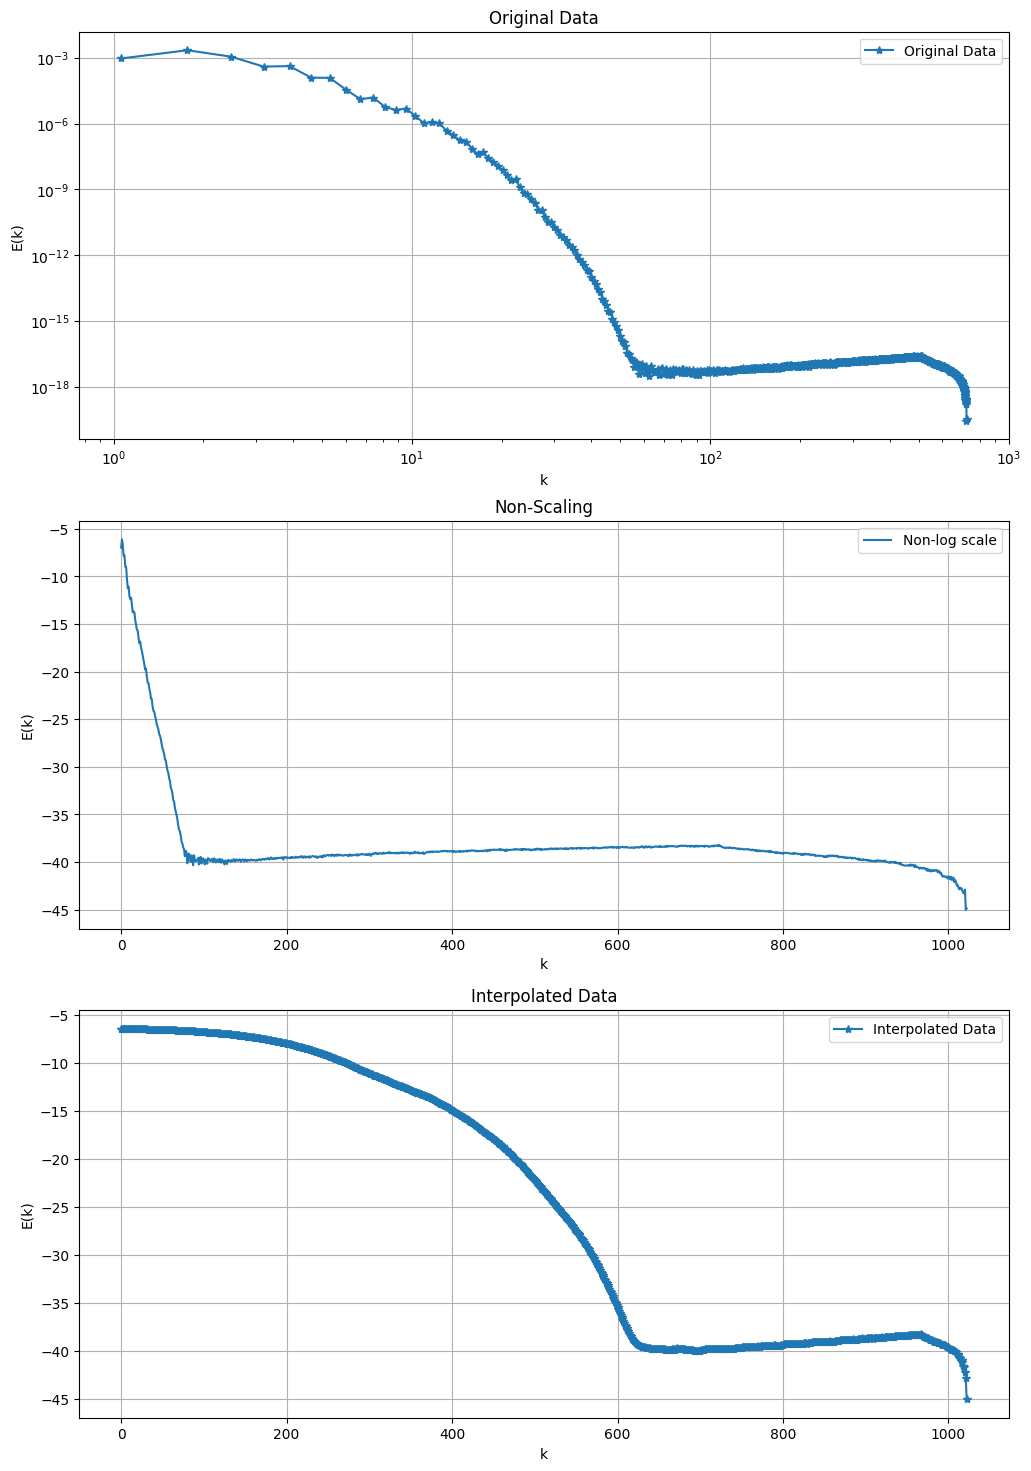

In [76]:
file = '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt'
k, ek = get_ek(file)
k = k[1:]
ek = ek[1:]

log_k = np.log(k)
log_E = np.log(ek)

window_length = 15
polyorder = 3
smoothed_log_E = savgol_filter(log_E, window_length, polyorder)

new_log_k = np.linspace(log_k.min(), log_k.max(), 1023)
interp_func = interp1d(log_k, smoothed_log_E, kind='linear', fill_value='extrapolate')
new_log_E = interp_func(new_log_k)
new_k = np.exp(new_log_k) 
new_E = np.exp(new_log_E)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Original Data
axes[0].loglog(k, ek, marker='*', label='Original Data')
axes[0].set_xlabel('k')
axes[0].set_ylabel('E(k)')
axes[0].set_title('Original Data')
axes[0].grid()
axes[0].legend()

# Interpolated Data
axes[2].plot(new_log_E, marker='*', label='Interpolated Data')
axes[2].set_xlabel('k')
axes[2].set_ylabel('E(k)')
axes[2].set_title('Interpolated Data')
axes[2].grid()
axes[2].legend()

# Non-log scale
axes[1].plot(log_E, label='Non-log scale')
axes[1].set_xlabel('k')
axes[1].set_ylabel('E(k)')
axes[1].set_title('Non-Scaling')
axes[1].grid()
axes[1].legend()

plt.show()

### Tracking ###

Tracking 1
Found segments:
Segment 1: indices 0 to 5, k from 1.06e+00 to 3.89e+00
Segment 2: indices 5 to 10, k from 4.60e+00 to 7.42e+00
Segment 3: indices 10 to 25, k from 8.13e+00 to 1.80e+01
Segment 4: indices 25 to 35, k from 1.87e+01 to 2.51e+01
Segment 5: indices 35 to 55, k from 2.58e+01 to 3.92e+01
Segment 6: indices 55 to 205, k from 4.00e+01 to 1.45e+02
Segment 7: indices 205 to 275, k from 1.46e+02 to 1.95e+02
Segment 8: indices 275 to 370, k from 1.96e+02 to 2.62e+02
Segment 9: indices 370 to 665, k from 2.63e+02 to 4.71e+02
Segment 10: indices 665 to 725, k from 4.71e+02 to 5.13e+02
Segment 11: indices 725 to 835, k from 5.14e+02 to 5.91e+02
Segment 12: indices 835 to 880, k from 5.92e+02 to 6.23e+02
Segment 13: indices 880 to 900, k from 6.23e+02 to 6.37e+02
Segment 14: indices 900 to 910, k from 6.37e+02 to 6.44e+02
Segment 15: indices 910 to 920, k from 6.45e+02 to 6.51e+02
Segment 16: indices 920 to 925, k from 6.52e+02 to 6.54e+02
Segment 17: indices 925 to 950, k fr

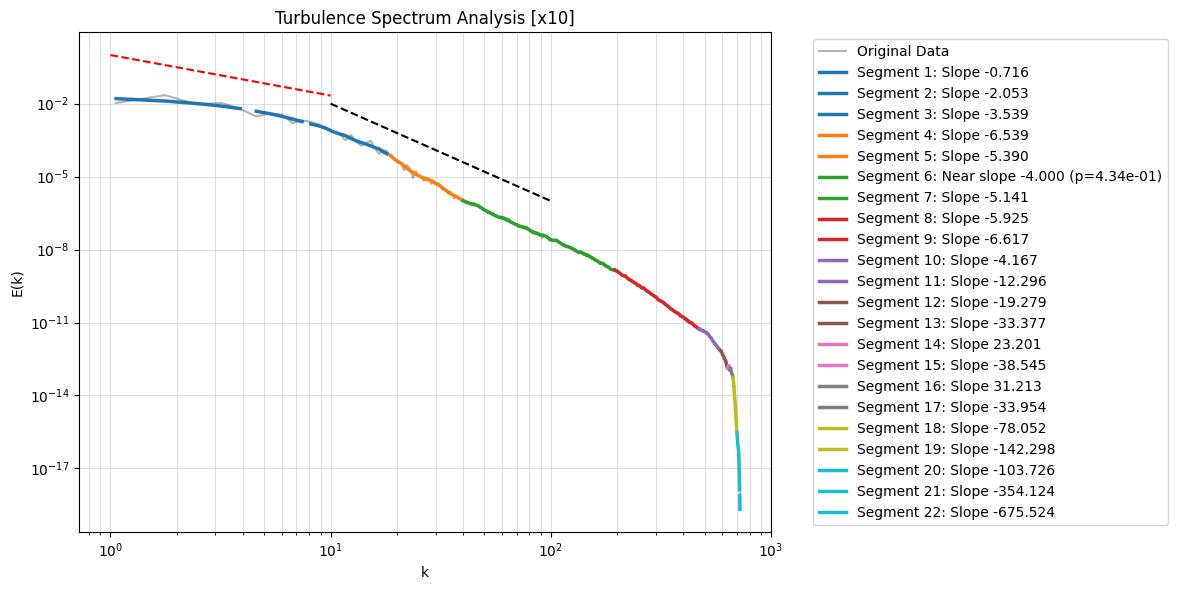

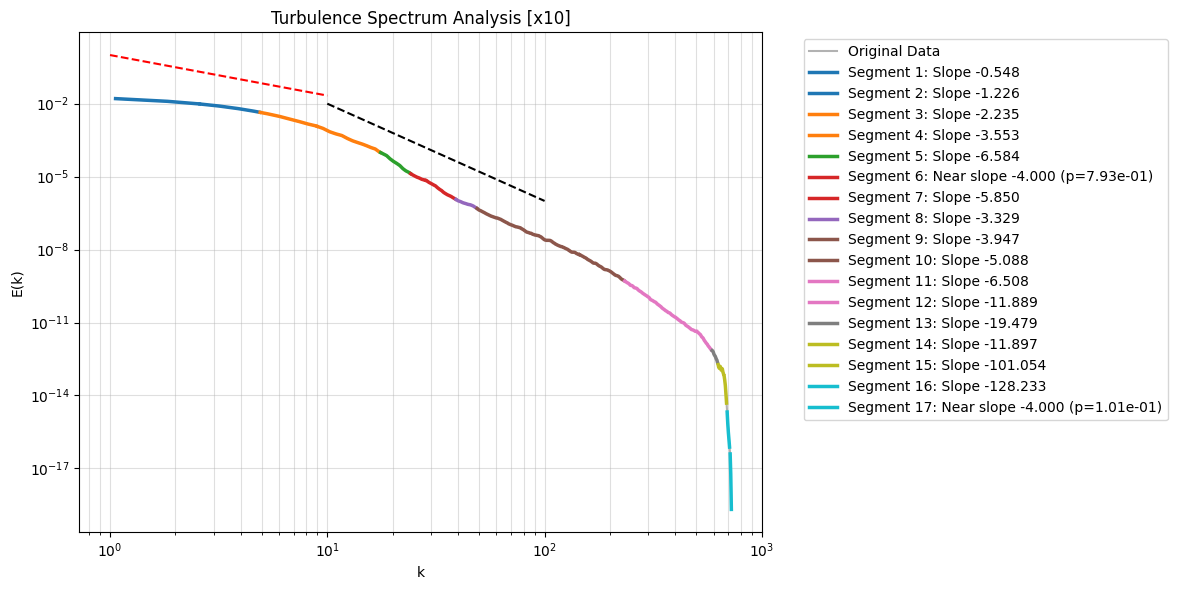

In [9]:
file = '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt'
print('Tracking 1')
tr.tracking(file, 1e-1, 'x10')
compared_line()
print('Tracking 2')
tr.tracking2(file, 1e-1, 'x10')
compared_line()


### Averaged across tume ###

In [26]:
all_ek = []

for file in files:
    k, e_k = get_ek(file)
    e_k = e_k[1:]
    all_ek.append(e_k)

k = k[1:]
all_ek = np.array(all_ek)
mean_ek = np.mean(all_ek, axis=0)

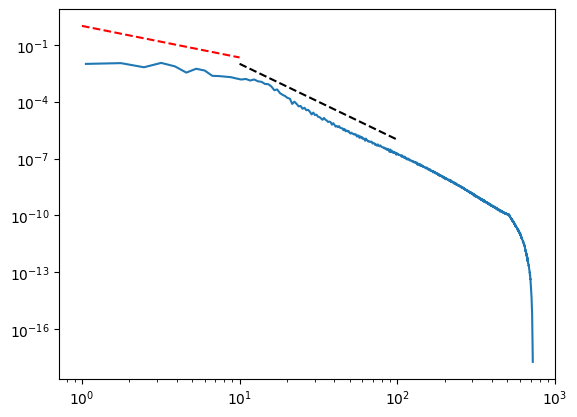

In [27]:
plt.loglog(k,mean_ek)
compared_line()

Found segments:
Segment 1: indices 0 to 25, k from 1.06e+00 to 1.80e+01
Segment 2: indices 25 to 275, k from 1.87e+01 to 1.95e+02
Segment 3: indices 275 to 740, k from 1.96e+02 to 5.24e+02
Segment 4: indices 740 to 895, k from 5.24e+02 to 6.33e+02
Segment 5: indices 895 to 985, k from 6.34e+02 to 6.97e+02
Segment 6: indices 985 to 1015, k from 6.98e+02 to 7.18e+02
Segment 7: indices 1015 to 1023, k from 7.19e+02 to 7.24e+02


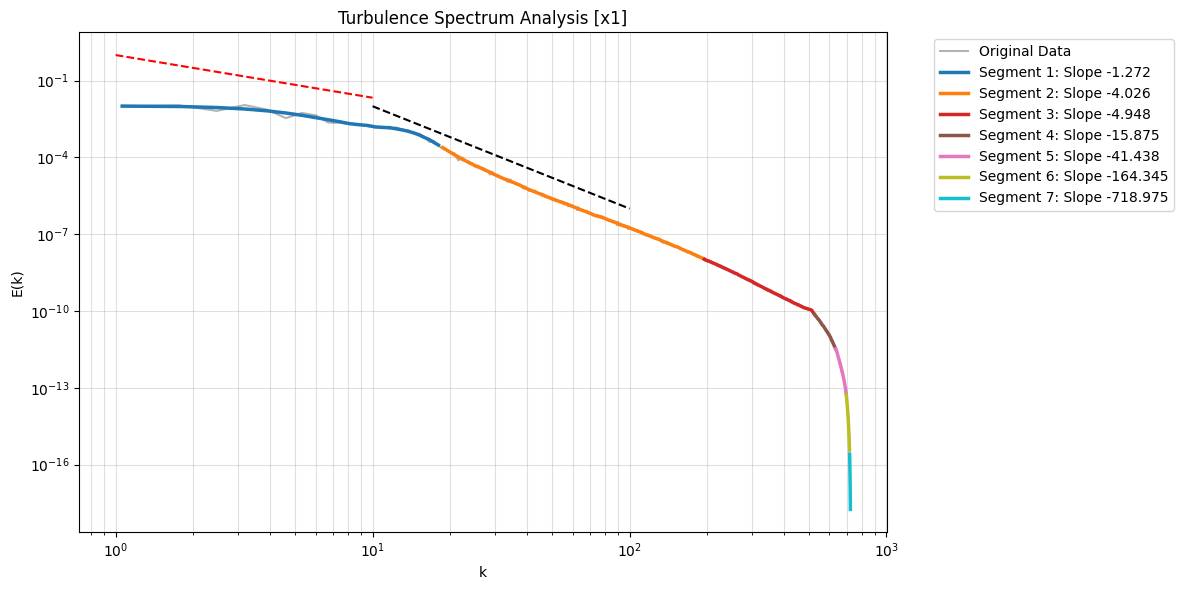

In [28]:
tr.tracking_data(k, mean_ek, 10, 'x1')
compared_line()

Found segments:
Segment 1: indices 0 to 195, k from 1.06e+00 to 3.66e+00
Segment 2: indices 195 to 435, k from 3.68e+00 to 1.69e+01
Segment 3: indices 435 to 965, k from 1.71e+01 to 5.00e+02
Segment 4: indices 965 to 1005, k from 5.03e+02 to 6.45e+02
Segment 5: indices 1005 to 1020, k from 6.49e+02 to 7.10e+02
Segment 6: indices 1020 to 1023, k from 7.15e+02 to 7.24e+02


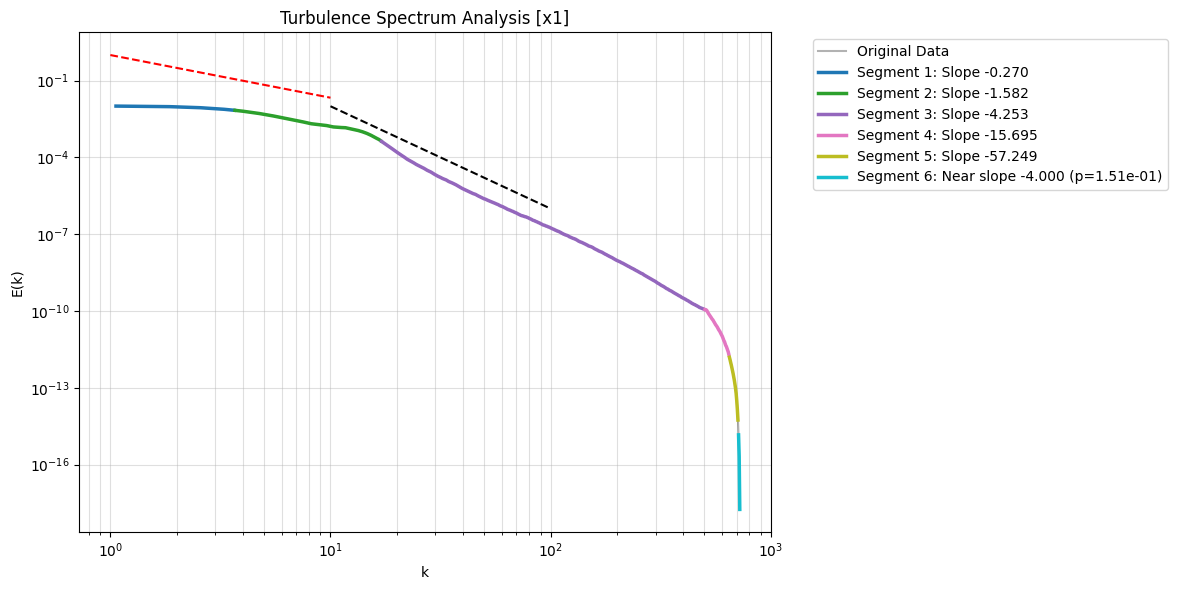

In [52]:
tr.tracking2_data(k, mean_ek, 15, 'x1')
compared_line()